## Python Project  (Prosper.com Dataset Exploration )
### by (Mamokete Tsotetsi)

### Introduction
The dataset is from Prosper.com,  a financial services company based in San Fransico. The company was founded in 2005 and is an online peer-to-peer lending platform that connects borrowers, individual and institutional investors. Borrowers can apply for loans of up to $40 000.The dataset contains loan information for the company for the periods 2005 until 2014.



## Preliminary Wrangling

In [145]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset


In [146]:
df = pd.read_csv('Prosper_Loan.csv')

In [92]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,26/08/2007,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,27/02/2014,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,05/01/2007,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,22/10/2012,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,14/09/2013,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,14/04/2013,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,03/11/2011,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,13/12/2013,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,14/11/2011,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274



### The main feaures of interest in the dataset are the following:

1. BorrowerAPR
2. LoanOriginalAmount
3. BorrowerRate
4. IncomeRange
5. LoanTerm
6. ListingCreationDate

### The following features in the dataset will help support my investigation into the feature(s) of interest:

1. BorrowerState
2. EmploymentStatus
3. IncomeVerifiable
4. ProsperRating (Alpha)

### Structure of dataset

In [93]:
df.shape

(113937, 81)

In [94]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Data Cleaning

#### 1. Converting Data Types

In [96]:
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)

C:\Users\User\AppData\Local\Temp\ipykernel_19588\125697857.py:1: UserWarning: Parsing '26/08/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)
C:\Users\User\AppData\Local\Temp\ipykernel_19588\125697857.py:1: UserWarning: Parsing '27/02/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)
C:\Users\User\AppData\Local\Temp\ipykernel_19588\125697857.py:1: UserWarning: Parsing '22/10/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)
C:\Users\User\AppData\Local\Temp\ipykernel_19588\125697857.py:1: UserWarning: Parsing '14/09/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.Listi

C:\Users\User\AppData\Local\Temp\ipykernel_19588\125697857.py:1: UserWarning: Parsing '26/03/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)
C:\Users\User\AppData\Local\Temp\ipykernel_19588\125697857.py:1: UserWarning: Parsing '29/12/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)
C:\Users\User\AppData\Local\Temp\ipykernel_19588\125697857.py:1: UserWarning: Parsing '25/01/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)
C:\Users\User\AppData\Local\Temp\ipykernel_19588\125697857.py:1: UserWarning: Parsing '21/11/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.Listi

In [97]:
df['ListingCreationDate'] = df['ListingCreationDate'].dt.year

#### 2. Deleting Irrelevant Columns 

In [99]:
df=df.drop(['CreditGrade'], axis=1)
df=df.drop(['ClosedDate'], axis=1)
df=df.drop(['LoanFirstDefaultedCycleNumber'], axis=1)

## The 'Question-Visualization-Observations' Framework was used throughout the data visualization process for both Univariate and Bivariate Explorations


## Univariate Exploration 

In [100]:
# What client employment status' has the highest number of loans taken out?

# Creating bar chart with seaborn to visualize the number of loans by employment status
df['EmploymentStatus'].value_counts().index

Index(['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other',
       'Part-time', 'Not employed', 'Retired'],
      dtype='object')

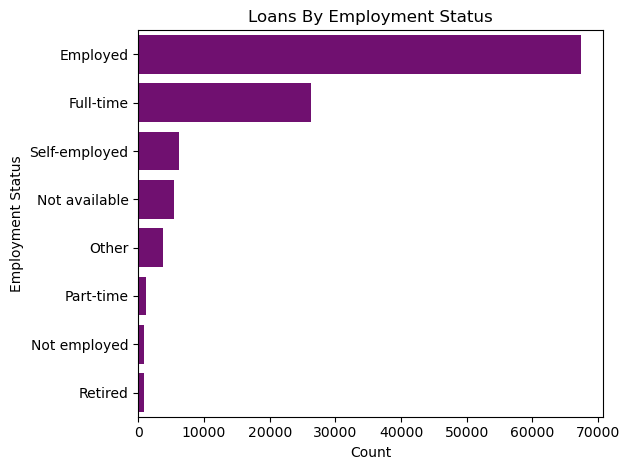

In [101]:
sns.countplot(data=df,y='EmploymentStatus', color ='#800080', order =df['EmploymentStatus'].value_counts().index);
plt.title('Loans By Employment Status');
plt.xlabel('Count');
plt.ylabel('Employment Status');

##### Observation
From the above visualization it is evident that most of the loans were issued to employed clients which gives the 
company a low risk exposure. It is however concerning to see that a small percentage of
loans were issued to unemployed clients. Based on this observation I advise management to verify that due process 
was followed when issuing loans to unemployed people.

In [102]:
# Which loan terms are popular amongst the company's clients?

# Creating Pie Chart With Metplotlib visualizing loan distribution per loan term
df['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [103]:
labels = df['Term'].value_counts().index;
values= df['Term'].value_counts();
colors = ['#800080', 'green', 'blue'];
explode = [0.3,0,0];

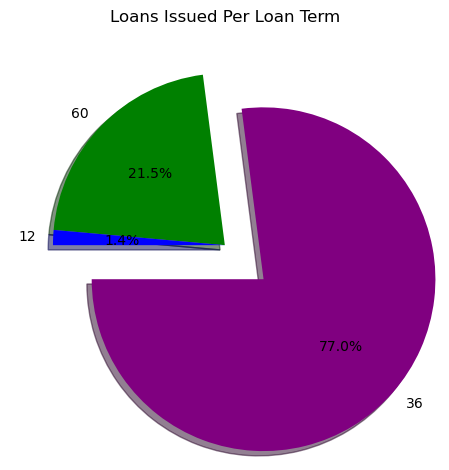

In [104]:
plt.pie(values, labels = labels, colors = colors, explode = explode, shadow = True, autopct='%1.1f%%', startangle=180);
plt.title('Loans Issued Per Loan Term');

##### Observation
It is clear from the chart that 36 month loan terms are the most popular amongst the clients at 77% and the 12 month 
loans are the least popular with only 1.4% of the clients taking them out. I recommend that proper research be done to 
determine how the company can increase the desirability of the 12 month loans to clients in order to attract more 
clients to the product.

In [22]:
# Which loan amounts were taken by majority of clients and which loans were the least popular? 

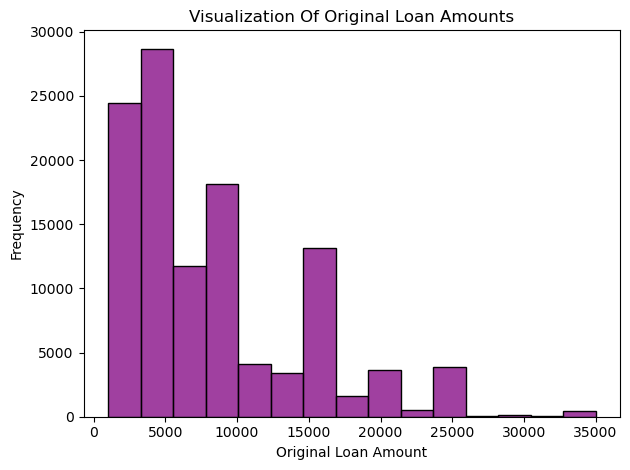

In [105]:
# Create a histogram using Seaborn to visualize the distribution of loan amounts
sns.histplot(data=df, x='LoanOriginalAmount', color ='#800080', bins=15)
plt.title('Visualization Of Original Loan Amounts');
plt.xlabel('Original Loan Amount');
plt.ylabel('Frequency');

##### Observation
From the visualization it seems that the most popular loan amounts taken out by clients range between $1 000 - $ 5 000. The company needs to grow its market for loans offerings higher than
$25 000 as the numbers are very low for the loans that were taken out.

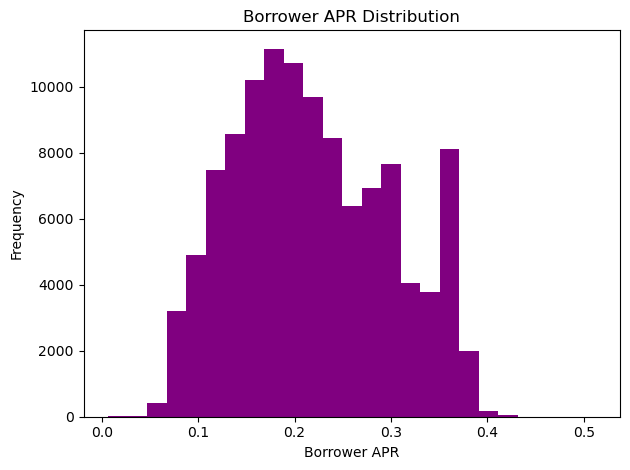

In [120]:
# What is the distribution of borrower APR amongst loans that were taken?

# Create histogram using Metplotlib for BorrowerAPR visualization
plt.hist(data=df, x='BorrowerAPR', bins =25, color='#800080');
plt.title('Borrower APR Distribution');
plt.xlabel('Borrower APR');
plt.ylabel('Frequency');
plt.show()

##### Observation
The APR is distributed between 0.1 and 0.43 with the highest concentration at 0.19 and o.2. Other high points of APR
are at 0.38 and 0.29.The higher rates indicate great returns for investors and will be a great selling point when trying to attract new investors for the business.

In [108]:
# Which States are the company's best performers in terms of number of loans issued?

# Plotting A Bar Chart in Metplotlib to determine top 10 State with highest number of loans
df['BorrowerState'].value_counts().head(10)

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
Name: BorrowerState, dtype: int64

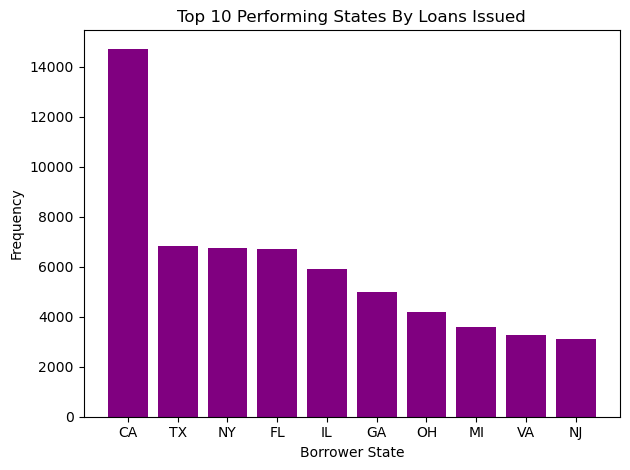

In [109]:
x = df['BorrowerState'].value_counts().head(10).index
y = df['BorrowerState'].value_counts().head(10)
plt.bar(x,y, color = '#800080');
plt.title('Top 10 Performing States By Loans Issued');
plt.xlabel('Borrower State');
plt.ylabel('Frequency');

##### Observation
From the chart above California is the top perfoming state on loans issued as it has almost double the number of loans
the other top performing states have. My recommendation for management to replicate the sales module they are using
in California in the other states as well to increase sales. It will also be beneficial for the company to pay close 
attention to the lower performing states to try and bring them on par with the top achieving states.

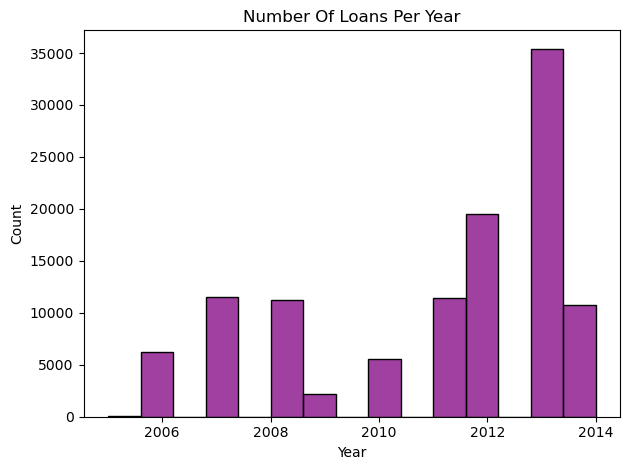

In [127]:
# Which years had the company's best performace by number of loans issued?

# Create a histogram using Seaborn to visualize the distribution of loan amounts
sns.histplot(data=df, x='ListingCreationDate', color ='#800080', bins=15)
plt.title('Number Of Loans Per Year');
plt.xlabel('Year');
plt.ylabel('Count');

##### Observation
The years 2012 and 2013 have the highest number of loans. There appears to be a spike in loans taken out in 2013 compared to previous years, this increase in loans could be attributed to the fact that the US economy was recovering from the 2008 recession and individuals and business were more open to taking out loans.

### Bivariate Visualization

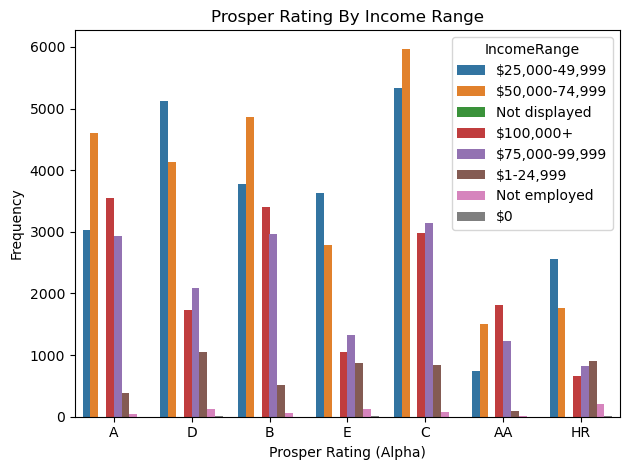

In [122]:
# What is the relationship between income range and Prosper rating?
# Stacked Bar Chart
sns.countplot(data=df, x='ProsperRating (Alpha)', hue='IncomeRange');
plt.title('Prosper Rating By Income Range');
plt.xlabel('Prosper Rating (Alpha)');
plt.ylabel('Frequency');

##### Observation
From the above chart it is clear that the income range between $25000 and 74 999 contribute the largest number of clients with good Prosper Ratings Score. It can also be seen that there is a relationship between income and Prosper Score with those that don't have income and the low earners having the lowest credit ratings.

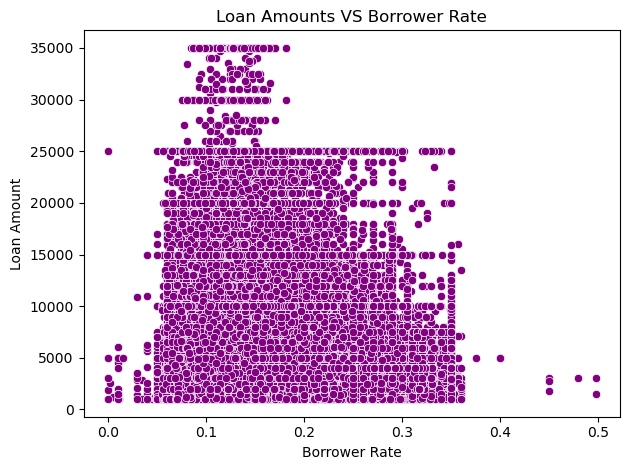

In [130]:
# What is the distribution of Borrower Rate per loan amount?

# Scatterplot
#br=np.arange(len(df['BorrowerRate']))
#ticks = plt.xticks(br[::25], df['BorrowerRate'].values[::25], rotation=90)
sns.scatterplot(x='BorrowerRate', y='LoanOriginalAmount', color ='#800080',data=df)
plt.title('Loan Amounts VS Borrower Rate');
plt.xlabel('Borrower Rate');
plt.ylabel('Loan Amount');

##### Observation
The loan amounts are evenly distributed between the borrower rates of 0.01 and 0.36, this is also due to the fact that there were a lot of loans taken out at these rates. There is less even distribution on loan amounts higher than $25 000 because a small number of loans were taken out. We can also see that the higher the loan amount the lower the borowwer rate. There were also a hand full of loans taken out between 0.4 and 0.5 borrowwer rates which illustrates that clients prefer to borrow at lower interest rates. 

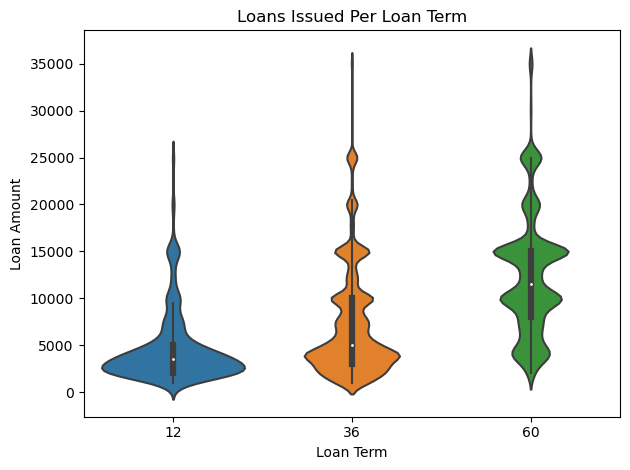

In [112]:
# What is the distribution of loan amounts per loan term?

# Violin Plot

sns.violinplot(data=df, x='Term',y='LoanOriginalAmount');
plt.title('Loans Issued Per Loan Term');
plt.xlabel('Loan Term');
plt.ylabel('Loan Amount');

##### Observation
The chart shows the distribution of loan amounts against loan terms. It appears that the 60 months loan term is more
evenly distributed across all loan amounts while the 12 and 36 months loan terms are mainly concentrated on loan amounts below $5000. The 36 months loan term is also somewhat distributed across all loan amounts .

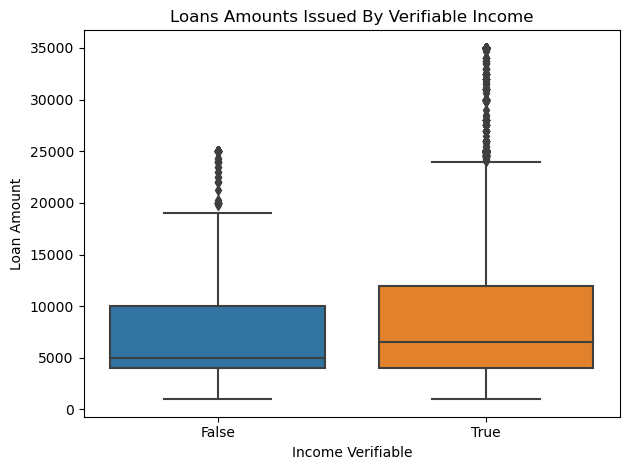

In [143]:
# Were there any approved loans issued without income verification?
# Create Box Plot
# convert Boolian variables to category data type
df['IncomeVerifiable'] = df['IncomeVerifiable'].astype('category')
sns.boxplot(data=df, x='IncomeVerifiable' , y='LoanOriginalAmount');
plt.title('Loan Amounts Issued By Verifiable Income');
plt.xlabel('Income Verifiable');
plt.ylabel('Loan Amount');

##### Observation
It is very concerning that there is such a high number of loans that were issued without verifying the clients income. 
the fact that loans of up to $25 000 were issued to clients without verifying income is very risky and negligent practice the company in issuing these loans  as there is a high probability that this will lead to customers defaulting on their loans and investors losing their money. 

### Relationships observed throughout the investigation. 

The relationships observed in this investigation were between Borrower Rate and Loan Amounts and between Income Range and Prosper Rating. It is evident that all incomes above $25 000 have a better Prosper Rating than those that earn beneath this income range and the unemployed which increases their chances of being given a loan. Another relationship was between interest rates for borrowing and orgiginal loan amounts. It is evident that smaller loan amounts attract higher interest rates than large loan amounts.

## Conclusions

From the analysis performed it is evident that the business has been performing well since inception in 2005. This is indicated by the rise in loans issued between 2006 and 2014 with the exception being 2009 and 2010 where there was a decline in loans because of the economic crisis of 2008. Of concern is the fact that the company has a negligent practice of issuing loans to unemployed customers and without verifying customer income which increases the company's risk exposure to customers not being able to pay back their loans.  

The Borrower APR and Borrower Rate which can go upto 20% and 40% are very favourable to the lenders. The smaller loan amounts are more evenly distributed across all interest rates while it seems that the higher the loan amounts the less interest rate charged on the loans. 

In order to grow the business the company needs to focus on growing it's client base in other states as a majority of loans issued were mainly issued in California which had double the number of loans as the next best performing state.